<a href="https://colab.research.google.com/github/kuppamcharan0606/Big-Mart-Sales-Prediction/blob/master/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection & Analysis

In [6]:
#loading the dataset from csv file to Pandas Dataframe
big_mart_data = pd.read_csv('/content/TrainBM.csv')

In [3]:
#frist 5 rows of dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Categorical Features:

*   Item_Identifier
*   Item_Fat_content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type










In [7]:
#Checking for missing values
big_mart_data.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average value

Mode --> most repeated value

In [11]:
#mean value of "item_weight" column
big_mart_data['Item_Weight'].mean()


12.857645184135976

In [12]:
#filling the missing values in "Item_weight" column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [13]:
#Checking for missing values
big_mart_data.isnull().sum() 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlet_Size" column with mode

In [16]:
 mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [17]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [21]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size)

Data Analysis

In [22]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

<Figure size 600x600 with 0 Axes>

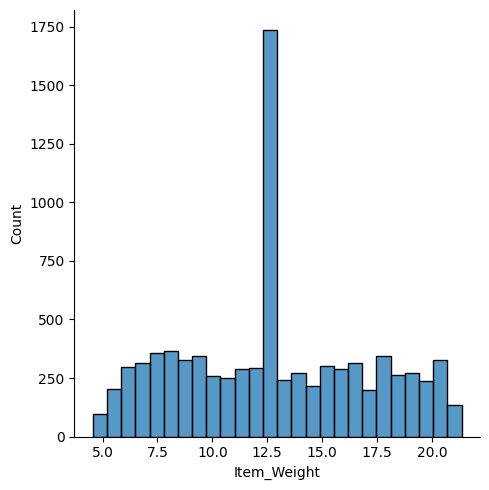

In [24]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

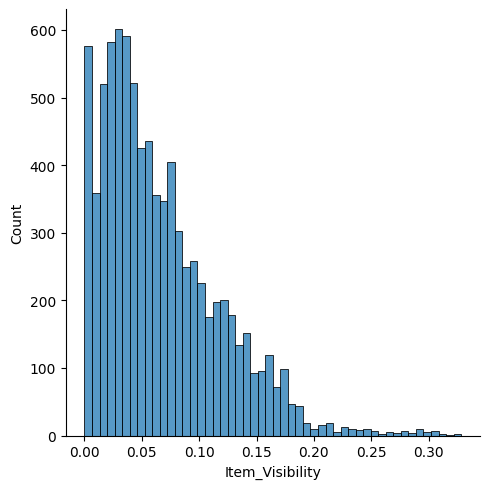

In [25]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

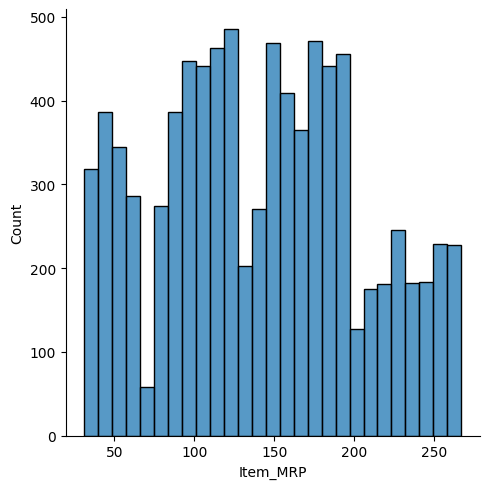

In [26]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

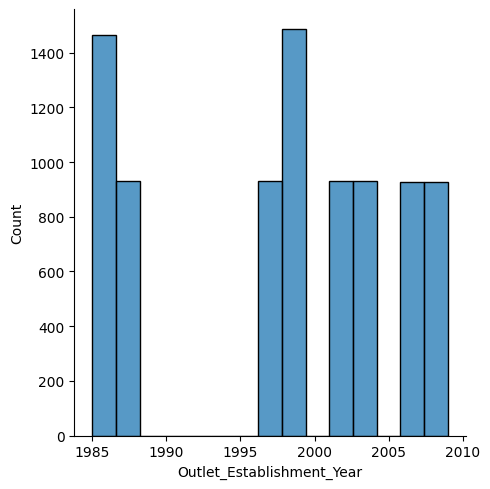

In [27]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Outlet_Establishment_Year'])
plt.show()

<Figure size 600x600 with 0 Axes>

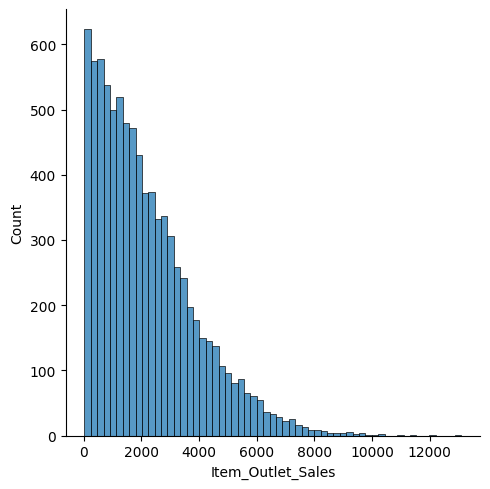

In [28]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

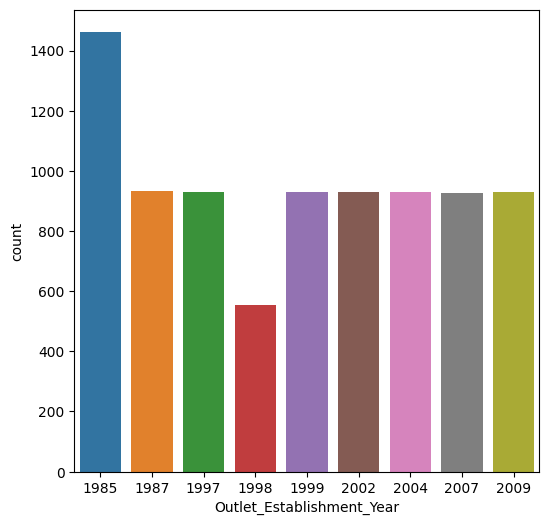

In [30]:
#Outlet_Establishment_Year Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

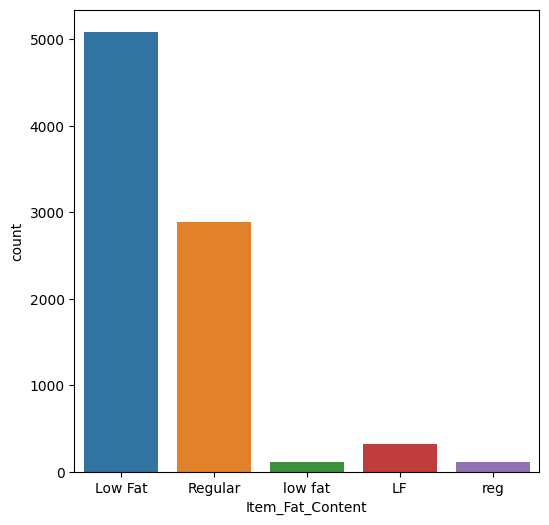

In [31]:
#Item_Fat_Content Column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

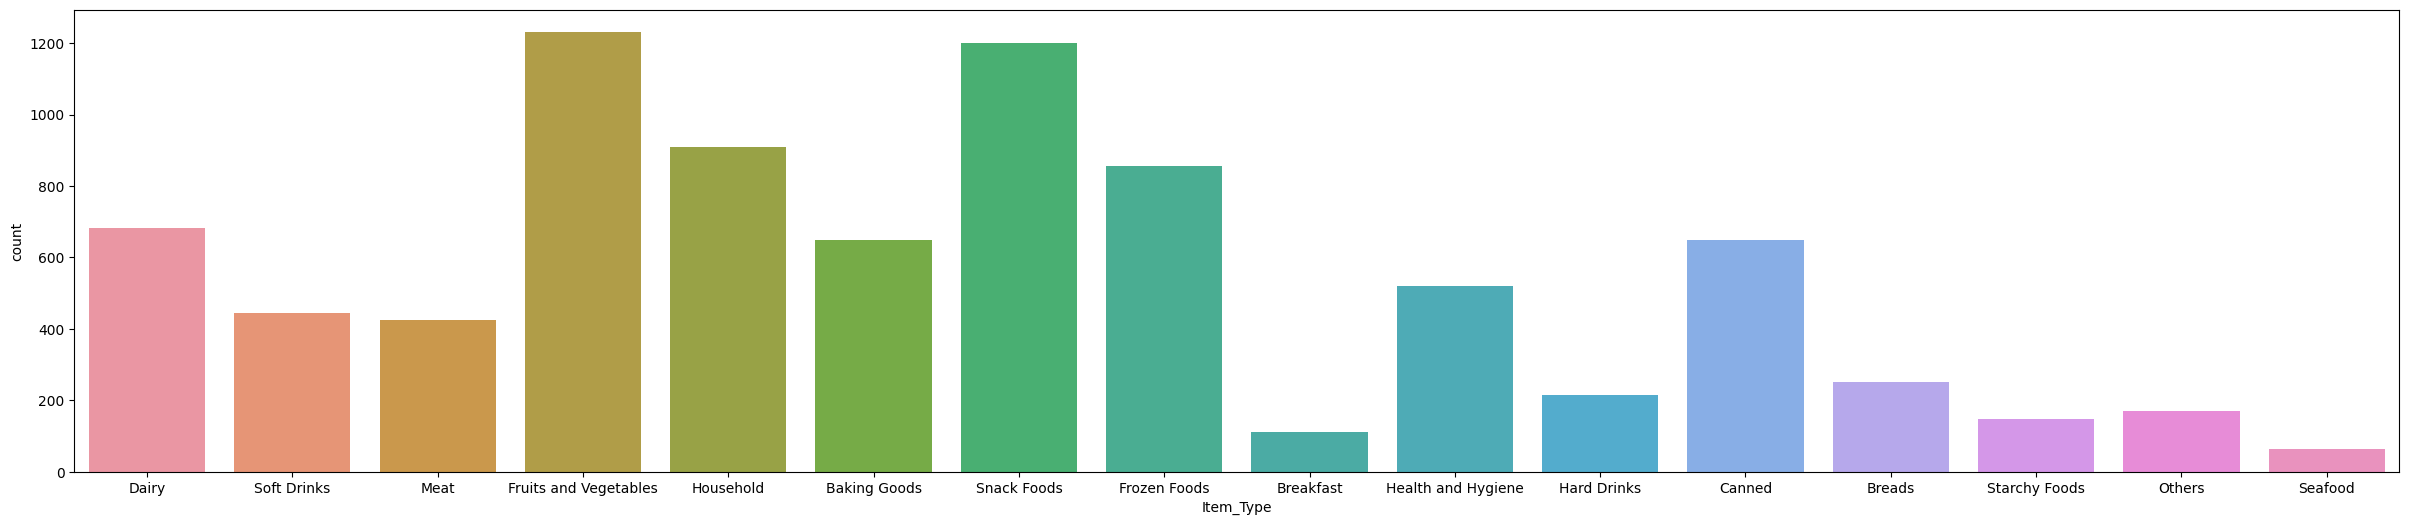

In [44]:
#Item_Type Column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title('Item_Type count')
plt.show()

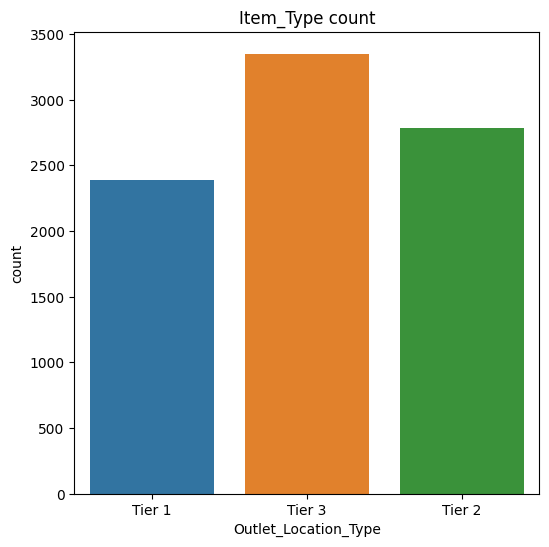

In [49]:
#Outlet_Location_Type Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=big_mart_data)
plt.title('Item_Type count')
plt.show()

Data Pre-Processing

In [50]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [53]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'low fat','LF':'Low FAt','reg':'Regular'}},inplace=True)

In [56]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
Low FAt     316
low fat     112
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [78]:
encoder = LabelEncoder()
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [68]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

Splitting the data into Training & Testing Data

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Machine Learning Model

XBGBoost Regressor

In [72]:
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

Evaluation

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R Squared Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Value =',r2_train)

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
#R Squared Value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Value =',r2_test)